# Sanderson's Wonderland
### Angewandte Systemwissenschaften I
#### Python - Wonderland

# Imports

In [1]:
from math import exp # Manche hatten darauf vergessen 'exp' explizit zu importieren
# Wenn man 'import math' benutzen möchte, muss man "math.exp" schreiben, da man dann 
# nur 'math' in den Namespace einfügt und im Namespace 'math' sich 'exp' befindet.
import matplotlib.pyplot as plt
%matplotlib inline

# Funktionen
(ohne Umwelt)

In [2]:
def technologie(p): return p*(1.0-CHI)
def wirtschaft(y,z): return y*(1.0+GAMMA-(GAMMA+ETA)*(1.0-z)**LAMBDA)
def population(x,y,z): return x*(1.0+geburtenrate(y,z)-sterberate(y,z))
def geburtenrate(y,z): e = y_strich(BETA,y,z); return BETA1 * (BETA2 - e/(1.0+e))
def sterberate(y,z): e = y_strich(ALPHA,y,z); return DELTA1 * (DELTA2 - e/(1.0+e)) * (1.0 + DELTA3 * (1.0-z)**THETA)
def y_strich(CONST,y,z): return exp(CONST * (y - umweltschutz(y,z)))
def fluss_emissionen(x,y,z,p): c_strich = exp(EPSILON * umweltschutz(y,z) * x); return x*y*p - KAPPA * (c_strich/(1.0+c_strich) - 0.5)
def umweltschutz(y,z): return PHI * (1.0-z)**MY * y

# Parameter
(```CHI = 0.01``` $\rightarrow$ Environmentalist's Nightmare)

In [3]:
# Geburtenrate
BETA1 = 0.04; BETA2 = 1.375; BETA = 0.16
# Sterberate
ALPHA = 0.18; DELTA1 = 0.01; DELTA2 = 2.5; DELTA3 = 4.0; THETA = 15.0
# Wirtschaft
GAMMA = 0.02; ETA = 0.1; LAMBDA = 2.0
# Umwelt
KAPPA = 2.0; EPSILON = 0.02; DELTA = 1.0; RHO = 2.0; OMEGA = 0.1; NY = 1.0
# Umweltschutz
PHI = 0.5; MY = 2.0
# Technologie
CHI = 0.01

# $\chi = 0.01$

# Umweltfunktion

In [4]:
def umwelt(x, y, z, p):
    g = exp(DELTA*z**RHO - OMEGA*fluss_emissionen(x,y,z,p))
    return z + NY * (z-z**2) * (g-1)

# Simulation

In [5]:
x_0 = y_0 = p_0 = 1.0
z_0 = 0.98

In [6]:
zustand_0 = (x_0, y_0, z_0, p_0)

In [7]:
def simulation(years=300):
    res = [zustand_0]
    for year in range(1, years, 1): # 300 Jahre
        # Zustand zum Zeitpunkt t entpacken
        x_t, y_t, z_t, p_t = res[-1]
        # Berechnung des Zustands in t+1
        x_neu = population(x_t, y_t, z_t)
        y_neu = wirtschaft(y_t, z_t)
        z_neu = umwelt(x_t, y_t, z_t, p_t)
        p_neu = technologie(p_t)
        # Initialisierung des Zustand-Tupels in t+1
        zustand_neu = (x_neu, y_neu, z_neu, p_neu)
        # Speicherung des neuen Zustands
        res.append(zustand_neu)
    return res

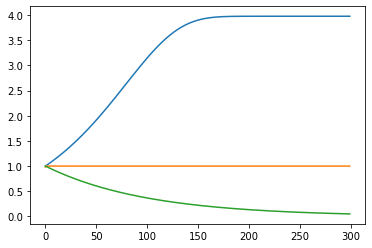

In [8]:
plt.plot([(x,z,p) for x,y,z,p in simulation()])